In [17]:
from PyPDF2 import PdfReader
from os import listdir
from os.path import join
import re

mypath = '..\\pdfs'

pdf_folder_content = [f for f in listdir(mypath) if f.endswith('.pdf')]
print(f'Found {len(pdf_folder_content)} PDFs in folder!')

for pdf in pdf_folder_content:
    print(f'Analyzing {pdf}...')
    discussion_text = ''
    in_discussion = False

    try:
        reader = PdfReader(join(mypath, pdf))
    except Exception as e:
        print(f'Error reading {pdf}: {e}')
        continue

    for page in reader.pages:
        page_text = page.extract_text()
        if page_text:
            if re.search(r'Discussion', page_text, re.IGNORECASE) and not in_discussion:
                start_index = page_text.find('Discussion') + len('Discussion')
                end_index = page_text.find('\n\n', start_index)
                if end_index == -1:  # If no double newline is found
                    end_index = len(page_text)
                discussion_text = page_text[start_index:end_index].strip()
                break  # Stop after extracting the first paragraph

    if discussion_text:
        with open(join(mypath, pdf.replace('.pdf', '_discussion.txt')), 'w') as f:
            f.write(discussion_text)
        print(f'First paragraph of Discussion section extracted from {pdf}')
    else:
        print(f'No Discussion section found in {pdf}')


Found 108 PDFs in folder!
Analyzing 0.pdf...
First paragraph of Discussion section extracted from 0.pdf
Analyzing 101.pdf...
First paragraph of Discussion section extracted from 101.pdf
Analyzing 103.pdf...
Error reading 103.pdf: EOF marker not found
Analyzing 107.pdf...
No Discussion section found in 107.pdf
Analyzing 109.pdf...
First paragraph of Discussion section extracted from 109.pdf
Analyzing 11.pdf...
First paragraph of Discussion section extracted from 11.pdf
Analyzing 111.pdf...
No Discussion section found in 111.pdf
Analyzing 113.pdf...
First paragraph of Discussion section extracted from 113.pdf
Analyzing 114.pdf...
First paragraph of Discussion section extracted from 114.pdf
Analyzing 115.pdf...
First paragraph of Discussion section extracted from 115.pdf
Analyzing 117.pdf...
Error reading 117.pdf: EOF marker not found
Analyzing 122.pdf...
First paragraph of Discussion section extracted from 122.pdf
Analyzing 125.pdf...
Error reading 125.pdf: EOF marker not found
Analyzing

Page Text of 109.pdf:
Comparing European countries' performances in the transition towards
the Circular Economy
Alfonso Marino, Paolo Pariso ⁎
University of Campania “Luigi Vanvitelli ”–Engineering Department, Via Roma 29, 81031 Aversa, CE, Italy
HIGHLIGHTS
•Assesses the transition degree of the
28EU Member States towards the circu-lar economy
•Comparing the CE state of art in Europe
•Measures the performances of the coun-
tries in the 3R activities for the transi-
tion towards the CE
•Evaluates the correlation between the
GDP and the strategic elements identi-
ﬁed by EU as barriers towards the
transition.GRAPHICAL ABSTRACT
abstract article info
Article history:
Received 13 November 2019Received in revised form 5 March 2020Accepted 21 March 2020Available online 21 April 2020
Keywords:Cross national comparative studyCircular EconomyEuropeGrowth Domestic Product3R actionsThe aim of the present research is to compare the performances of the 28 EU Member States in the period
2006 –2016 in 

In [19]:
from textblob import TextBlob
from os import listdir
from os.path import join
import pandas as pd
import re 

mypath = '..\\pdfs'
discussion_files = [f for f in listdir(mypath) if f.endswith('_discussion.txt')]

df = pd.DataFrame(columns=['filename', 'polarity', 'subjectivity'])

for file in discussion_files:
    with open(join(mypath, file), 'r') as f:
        discussion_text = f.read()

    blob = TextBlob(discussion_text)

    sentiment = blob.sentiment

    match = re.match(r'(\d+)_', file)
    if match:
        index = int(match.group(1))  
    else:
        continue  


    df.loc[index] = [file, sentiment.polarity, sentiment.subjectivity]

df = df.sort_index()

df.to_csv(join(mypath, 'sentiment_analysis_results.csv'))

print(len(df))
df


49


filename  polarity  subjectivity
0      0_discussion.txt  0.073810      0.302143
3      3_discussion.txt -0.037667      0.257000
8      8_discussion.txt  0.079946      0.359270
11    11_discussion.txt -0.016346      0.228325
14    14_discussion.txt  0.025449      0.366492
15    15_discussion.txt  0.063877      0.379412
16    16_discussion.txt -0.033701      0.198050
17    17_discussion.txt  0.015706      0.252924
19    19_discussion.txt -0.026327      0.296735
22    22_discussion.txt  0.030728      0.355521
23    23_discussion.txt  0.030728      0.355521
24    24_discussion.txt  0.097566      0.350888
27    27_discussion.txt  0.047838      0.386783
30    30_discussion.txt  0.041146      0.251042
35    35_discussion.txt -0.038846      0.173279
72    72_discussion.txt  0.055878      0.351897
77    77_discussion.txt  0.123762      0.338025
83    83_discussion.txt  0.095744      0.444331
90    90_discussion.txt  0.007712      0.259454
92    92_discussion.txt -0.012853      0.181356
98    98_discussion.txt -0.039047      0.249057
101  101_discussion.txt  0.043837      0.268891
109  109_discussion.txt  0.017157      0.285541
113  113_discussion.txt  0.060921      0.328386
114  114_discussion.txt  0.032216      0.396421
115  115_discussion.txt  0.027221      0.273684
122  122_discussion.txt -0.033548      0.284452
128  128_discussion.txt  0.001541      0.311531
130  130_discussion.txt -0.001439      0.328639
139  139_discussion.txt -0.116453      0.228316
144  144_discussion.txt -0.012333      0.297095
145  145_discussion.txt -0.016667      0.300000
150  150_discussion.txt  0.044581      0.242818
153  153_discussion.txt  0.049105      0.366041
161  161_discussion.txt -0.200000      0.000000
162  162_discussion.txt  0.101684      0.455031
168  168_discussion.txt  0.047063      0.264246
179  179_discussion.txt -0.054867      0.331073
180  180_discussion.txt  0.111711      0.413127
182  182_discussion.txt  0.064888      0.323606
185  185_discussion.txt  0.091405      0.366923
188  188_discussion.txt  0.057925      0.250966
192  192_discussion.txt  0.003076      0.320952
194  194_discussion.txt -0.015641      0.351206
199  199_discussion.txt -0.098661      0.386706
208  208_discussion.txt  0.029101      0.379893
218  218_discussion.txt  0.044348      0.287885
225  225_discussion.txt  0.064773      0.414773
227  227_discussion.txt -0.003704      0.348148

In [22]:
from PyPDF2 import PdfReader
import os
from os import listdir
from os.path import join, isdir
import re

def remove_inline_citations(text):
    # Regular expression to match inline citations
    citation_pattern = r'\(.*?\)|\[.*?\]'
    # Remove these citations from the text
    cleaned_text = re.sub(citation_pattern, '', text)
    return cleaned_text

def extract_paragraphs_from_pdf(pdf_text, pdf_name):
    # Split text into paragraphs based on newline characters
    paragraphs = pdf_text.split('\n\n')

    # Clean and store paragraphs with the PDF name
    cleaned_paragraphs = []
    for paragraph in paragraphs:

        # Remove inline citations
        paragraph = remove_inline_citations(paragraph)

        # Remove single newlines (often artifacts of text extraction)
        paragraph = paragraph.replace('\n', ' ')

        # Add logic here to remove unwanted sections like stats, tables, figures, bibliography

        # Add the cleaned paragraph to the list with the PDF name
        cleaned_paragraphs.append((pdf_name, paragraph))

    return cleaned_paragraphs


def write_paragraphs_to_file(paragraphs, pdf_name, output_path):
    # Creating a separate text file for each PDF
    filename = join(output_path, pdf_name.replace('.pdf', '_paragraphs.txt'))
    with open(filename, 'w', encoding='utf-8') as file:
        for _, paragraph in paragraphs:
            file.write(paragraph + '\n\n')

def read_pdf_and_extract_paragraphs(mypath, output_path):
    if not isdir(output_path):
        os.makedirs(output_path)
    all_paragraphs = []

    pdf_folder_content = [f for f in listdir(mypath) if f.endswith('.pdf')]
    for pdf in pdf_folder_content:
        try:
            reader = PdfReader(join(mypath, pdf))
            full_text = ''
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    full_text += page_text + '\n'

            paragraphs = extract_paragraphs_from_pdf(full_text, pdf)
            all_paragraphs.extend(paragraphs)
            write_paragraphs_to_file(paragraphs, pdf, output_path)  # Write to file

        except Exception as e:
            print(f'Error reading {pdf}: {e}')

    return all_paragraphs

mypath = '..\\pdfs'  # Path to your PDFs
output_path = '..\\pdfs\\extracted_paragraphs'  # Path for output text files

# Extract paragraphs and write them to separate files
extracted_paragraphs = read_pdf_and_extract_paragraphs(mypath, output_path)

# Print extracted paragraphs
for pdf_name, para in extracted_paragraphs:
    print(f"PDF: {pdf_name}, Paragraph: {para}")
    print("-----")

Error reading 103.pdf: EOF marker not found
Error reading 117.pdf: EOF marker not found
Error reading 125.pdf: EOF marker not found
Error reading 126.pdf: EOF marker not found
Error reading 13.pdf: EOF marker not found
Error reading 132.pdf: EOF marker not found
Error reading 138.pdf: EOF marker not found
Error reading 143.pdf: EOF marker not found
Error reading 146.pdf: EOF marker not found
Error reading 149.pdf: EOF marker not found
Error reading 152.pdf: Cannot read an empty file
Error reading 154.pdf: EOF marker not found
Error reading 157.pdf: EOF marker not found
Error reading 171.pdf: EOF marker not found
Error reading 173.pdf: EOF marker not found
Error reading 175.pdf: EOF marker not found
Error reading 176.pdf: EOF marker not found
Error reading 184.pdf: EOF marker not found
Error reading 191.pdf: EOF marker not found
Error reading 193.pdf: EOF marker not found
Error reading 20.pdf: EOF marker not found
Error reading 210.pdf: EOF marker not found
Error reading 212.pdf: EOF ma

In [24]:
from textblob import TextBlob
from os import listdir
from os.path import join
import pandas as pd
import re 

mypath = '..\\pdfs\\extracted_paragraphs'
paragraph_files = [f for f in listdir(mypath) if f.endswith('_paragraphs.txt')]

df = pd.DataFrame(columns=['filename', 'polarity', 'subjectivity'])

for file in paragraph_files:
    with open(join(mypath, file), 'r') as f:
        paragraphs_text = f.read()

    blob = TextBlob(paragraphs_text)

    sentiment = blob.sentiment

    match = re.match(r'(\d+)_', file)
    if match:
        index = int(match.group(1))  
    else:
        continue  


    df.loc[index] = [file, sentiment.polarity, sentiment.subjectivity]

df = df.sort_index()

df.to_csv(join(mypath, 'sentiment_analysis_results.csv'))

print(len(df))
df


62


filename  polarity  subjectivity
0      0_paragraphs.txt  0.036383      0.327679
3      3_paragraphs.txt -0.028278      0.250289
8      8_paragraphs.txt  0.060866      0.315306
11    11_paragraphs.txt -0.027378      0.227190
14    14_paragraphs.txt -0.016967      0.282436
..                  ...       ...           ...
208  208_paragraphs.txt  0.043234      0.323712
218  218_paragraphs.txt -0.001177      0.278652
224  224_paragraphs.txt  0.067124      0.376026
225  225_paragraphs.txt  0.042689      0.347207
227  227_paragraphs.txt  0.022106      0.301052

[62 rows x 3 columns]

<Axes: title={'center': 'Subjectivity'}>

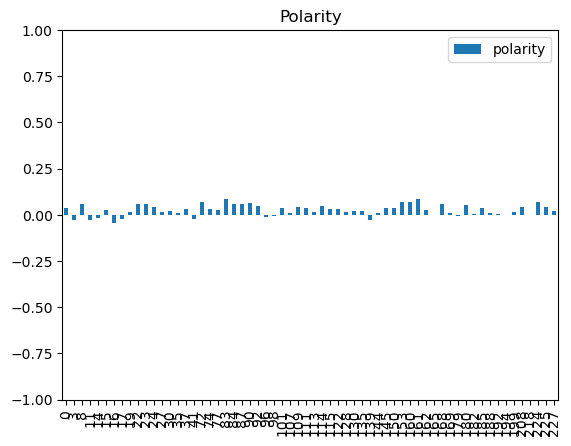

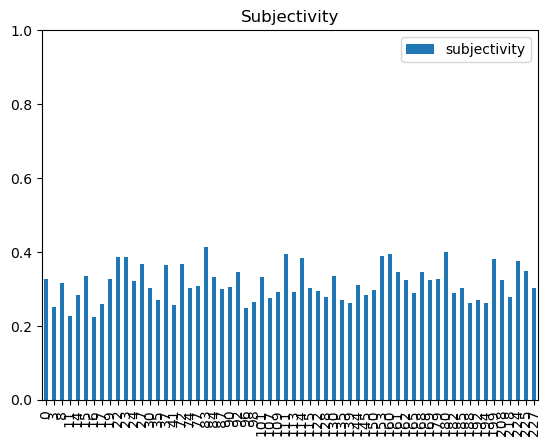

In [25]:
df.plot(y='polarity', kind='bar', ylim=[-1, 1], title='Polarity')
df.plot(y='subjectivity', kind='bar', ylim=[0, 1], title='Subjectivity')


In [26]:
df.describe()

polarity  subjectivity
count  62.000000     62.000000
mean    0.025823      0.314470
std     0.030075      0.046277
min    -0.044485      0.224893
25%     0.007813      0.279488
50%     0.026678      0.305830
75%     0.045542      0.345572
max     0.086491      0.412019

Error reading 103.pdf: EOF marker not found
Error reading 117.pdf: EOF marker not found


KeyboardInterrupt: 